In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization,Conv2D,MaxPooling2D,Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB7,Xception,DenseNet121,InceptionV3,EfficientNetB3
from tensorflow.keras import Model
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.layers import concatenate
%matplotlib inline

In [4]:
from keras.layers import GlobalAveragePooling2D

In [3]:
train_path="/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training"
test_path="/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Validation"
model_saving_path="/kaggle/working/model/"

In [4]:
#train_gen=ImageDataGenerator(shear_range=0.2,zoom_range=0.2, horizontal_flip=True,validation_split=0.2)


In [5]:
#test_gen=ImageDataGenerator()

In [6]:
# train_set = train_gen.flow_from_directory (
#     train_path,
#     target_size=(224,224),
#     batch_size=128,
#     class_mode='binary',
#     subset="training")

In [7]:
# valid_set = train_gen.flow_from_directory (
#     train_path,
#     target_size=(224,224), 
#     batch_size=64,
#     class_mode='binary',
#     subset="validation")

In [8]:
# test_set = test_gen.flow_from_directory (
#     test_path,
#     target_size=(224,224), 
#     batch_size=64,
#     class_mode='binary')

In [3]:
female="/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training/female"
male="/kaggle/input/gender-classified-dataset-with-masked-face/GenderOcclusionData/Training/male"

In [5]:
f_files=[i for i in os.listdir(female) if "_Mask.jpg" in i][5000:6500]
m_files=[i for i in os.listdir(male) if "_Mask.jpg" in i][5000:6500]

In [6]:
X=[]
Y=[]

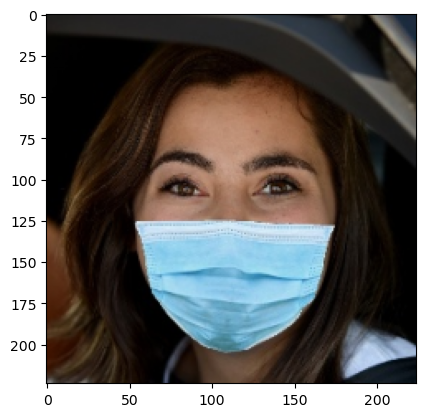

In [44]:
img=cv2.imread(female+"/"+f_files[440],1)
img2=cv2.resize(img,(224,224))
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3=img2/255
plt.imshow(img3)

In [6]:
for i in f_files:
    path=female+"/"+i
    img=cv2.imread(path)
    img2=cv2.resize(img,(224,224))
    img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    X.append(img2)
    Y.append(0)

In [7]:
for i in m_files:
    path=male+"/"+i
    img=cv2.imread(path)
    img2=cv2.resize(img,(224,224))
    img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
    X.append(img2)
    Y.append(1)

In [10]:
print(len(X),len(Y))

3000 3000


In [9]:
x_train=np.array(X)/255
y_train=np.array(Y)

In [8]:
x_test=np.array(X)/255
y_test=np.array(Y)

In [11]:
input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)

In [10]:
del X
del Y

In [12]:
densenet = DenseNet121(input_tensor=input_layer, include_top=False, weights='imagenet')
xception = Xception(input_tensor=input_layer, include_top=False, weights='imagenet')

83683744/83683744 [==============================] - 3s 0us/step


In [15]:
print(xception.output,densenet.ouptut)

<KerasTensor: shape=(None, 7, 7, 2048) dtype=float32 (created by layer 'block14_sepconv2_act')>

In [13]:
merged=concatenate([densenet.output,xception.output])

In [14]:
model=Model(inputs=input_layer,outputs=merged)

In [16]:
img3=img2.reshape((1,224,224,3))
features_img3=model.predict(img3)

1/1 [==============================] - 3s 3s/step


In [45]:
features_img3.shape

(1, 7, 7, 3072)

In [33]:
maps=features_img3[:,:,:,1000:1010].reshape((10,7,7))

In [ ]:
ma

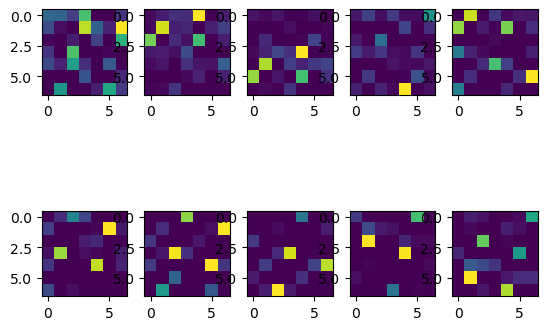

In [34]:
fig, axs = plt.subplots(2, 5)
k=0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(maps[k])
        k=k+1
fig.show()

In [9]:
model.save("comb_model.h5")

In [15]:
features=model.predict(x_train)

188/188 [==============================] - 1139s 6s/step


In [16]:
feat=features.reshape(features.shape[0],-1)

In [14]:
test_features=model.predict(x_test)

94/94 [==============================] - 596s 6s/step


In [15]:
test_feat=test_features.reshape(test_features.shape[0],-1)

In [17]:
np.save("/kaggle/working/merg_training_feat",feat)

In [16]:
np.save("training_target",y_train)

In [16]:
np.save("/kaggle/working/merg_testing_feat",test_feat)

In [28]:
np.save("testing_target",y_test)

In [ ]:
features=densenet.predict(valid_set)

In [ ]:
feat=features.reshape(features.shape[0],-1)